# **Data Exploration and Demand Forcasting**

It is imporant we have a firm grasp of the insights in a data set to understand how the variables interact with each other and also extract possible insights that may prove useful in this project. As a a result we will explore the data to try and derive insights then we will move forward and perform demand forcasting on the data.

In [ ]:
#import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import statsmodels.api as sm

## **Exploratory data analysis (EDA)**
In this sectionn, we will look at patterns and regualriries that exisit in our data set and try to bring out meaning in it. we willl also do some data cleaning to be cetain the data is in the format we want.
The flow of task will incluse:
1. **Data collection:** in this section we will bring light to the range and the method of collection of the data.


2. **Data cleaning and standardization:** In this section we will check for possible errors and streamline the data for the useful part to our analysis.



3. **Descriptive statatistics:** In this section we will look at statistical values to our data which may more explanation to our data such as MAX, MIN , VARIANCE  and so on. This will give a explanatory scope at the data we will look at. This section will be the overwhekliming majority to our ecplanatory data analysis step. In this project we will use visualization for this step as well.

**Data collection**

The data will range from the begining of the year i.e january 1st up until septemper 16 on the year 2023. Data was collected in form of recording daily trasactions in petrol sales.

**Data cleaning and standardization**

In this section our aim is to make sure the data is in a form which can be processed without errors.

In [ ]:
# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('/content/Final.xlsx')

df.head()

,Date,PUMP 1A,PUMP 1B,PUMP 2A,PUMP 2B,PUMP 3A,PUMP 3B,PUMP 4A,PUMP 4B,Total
0,2023-01-01,0.00,1923.25,1013.21,0.0,1866.89,0.0,0,0,4803.35
1,2023-01-02,1678.52,0.00,2894.28,0.0,2071.83,0.0,0,0,6644.63
2,2023-01-03,3582.78,0.00,2877.08,0.0,1974.04,0.0,0,0,8433.90
3,2023-01-04,2710.96,0.00,1600.70,0.0,2883.58,0.0,0,0,7195.24
4,2023-01-05,2040.29,0.00,2577.68,0.0,1710.97,0.0,0,0,6328.94


In [ ]:
# Drop the 'PUMP 4A' and 'PUMP 4B' columns
df = df.drop(['PUMP 4A', 'PUMP 4B'], axis=1)

In [ ]:
#Make column heads set into lowercase for uniformity
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns


Index(['Date', 'PUMP 1A', 'PUMP 1B', 'PUMP 2A', 'PUMP 2B', 'PUMP 3A',
       'PUMP 3B', 'Total'],
      dtype='object')

In [ ]:
# rows X columns
df.shape

(257, 8)

In [ ]:
# Remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

In [ ]:
#check for duplicates
# Create a Boolean Series indicating duplicate rows
duplicate_rows = df.duplicated()

# Create a new DataFrame containing only the duplicate rows
duplicate_df = df[duplicate_rows]

# Alternatively, you can directly drop duplicates to keep only unique rows
df_unique = df.drop_duplicates()
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [ ]:
# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Convert all columns to lowercase
df.columns = [column.lower() for column in df.columns]

# Display the resulting DataFrame
df.head()

,date,pump 1a,pump 1b,pump 2a,pump 2b,pump 3a,pump 3b,total
0,2023-01-01,0.00,1923.25,1013.21,0.0,1866.89,0.0,4803.35
1,2023-01-02,1678.52,0.00,2894.28,0.0,2071.83,0.0,6644.63
2,2023-01-03,3582.78,0.00,2877.08,0.0,1974.04,0.0,8433.90
3,2023-01-04,2710.96,0.00,1600.70,0.0,2883.58,0.0,7195.24
4,2023-01-05,2040.29,0.00,2577.68,0.0,1710.97,0.0,6328.94


In [ ]:
#we use fucntions to show us statistical values of the data
df.describe()

,pump 1a,pump 1b,pump 2a,pump 2b,pump 3a,pump 3b,total
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,724.736148,1007.924786,886.682451,349.727004,1223.133268,302.829611,4495.033268
std,1200.017282,972.305150,1451.475836,568.692607,1558.681362,603.992311,3841.253282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2439.960000
50%,0.000000,911.010000,2.000000,0.000000,832.930000,0.000000,2932.260000
75%,922.100000,1593.610000,1210.860000,661.960000,1609.360000,333.060000,4717.830000
max,6433.280000,6321.610000,8018.390000,2239.180000,9436.430000,3234.950000,23368.860000


<ipython-input-19-1ba67e25cb0c>:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average_sales = df[columns_to_include].mean()


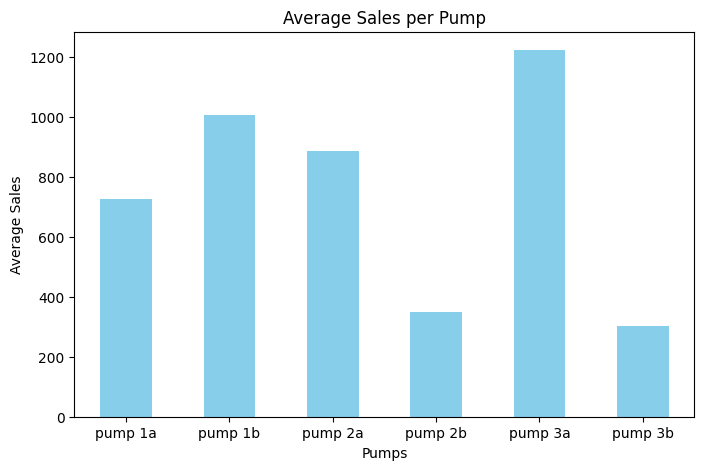

In [ ]:
# we visualize some of the data above to give more prespective

# Sample DataFrame with a "Total" column

# Select only the columns you want to include in the calculation
columns_to_include = ['date', 'pump 1a', 'pump 1b', 'pump 2a', 'pump 2b', 'pump 3a', 'pump 3b']

# Calculate the average sales for selected columns
average_sales = df[columns_to_include].mean()

# Create a bar chart to visualize the averages
plt.figure(figsize=(8, 5))
average_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Pump')
plt.xlabel('Pumps')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


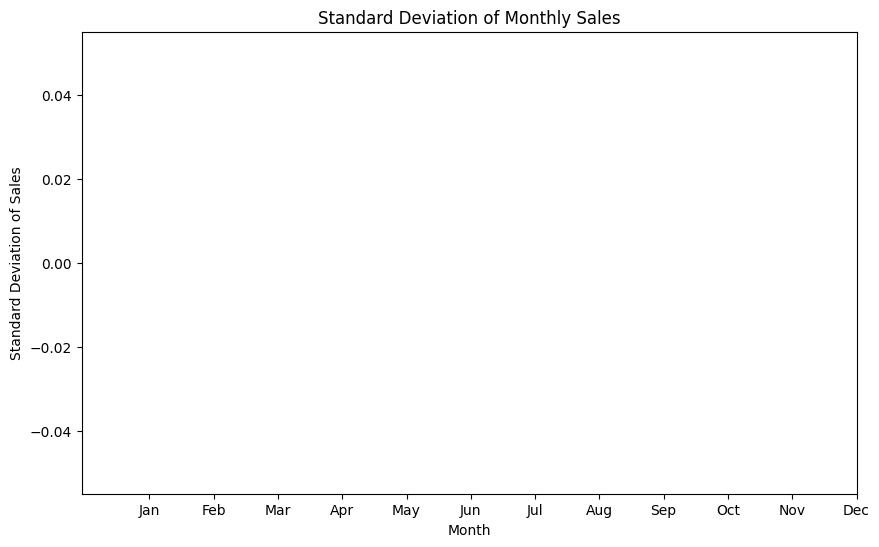

In [ ]:

# Extract month and year from the 'Date' column
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

# Aggregate daily sales data into monthly sums
monthly_sales = df.groupby(['Year', 'Month'])['total'].sum().reset_index()

# Calculate the standard deviation of monthly sales
std_deviation = monthly_sales.groupby('Month')['total'].std()

# Plot the standard deviation with sky blue color
plt.figure(figsize=(10, 6))
plt.bar(std_deviation.index, std_deviation.values, tick_label=std_deviation.index, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Sales')
plt.title('Standard Deviation of Monthly Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


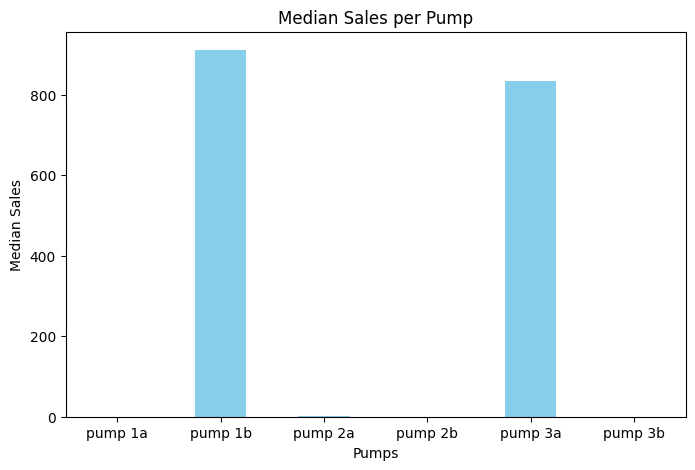

In [ ]:
#calculating median
# Select only the numerical columns you want to include in the calculation
columns_to_include = ['pump 1a', 'pump 1b', 'pump 2a', 'pump 2b', 'pump 3a', 'pump 3b']

# Calculate the median sales for selected columns
median_sales = df[columns_to_include].median()

# Create a bar chart to visualize the median sales
plt.figure(figsize=(8, 5))
median_sales.plot(kind='bar', color='skyblue')
plt.title('Median Sales per Pump')
plt.xlabel('Pumps')
plt.ylabel('Median Sales')
plt.xticks(rotation=0)
plt.show()



In [ ]:
import pandas as pd


# Calculate the median for each column
column_medians = df.median()

# Print the column medians
for column_name, median in column_medians.iteritems():
    print(f"Median of {column_name}: {median}")


Median of pump 1a: 0.0
Median of pump 1b: 911.0100000000093
Median of pump 2a: 2.0
Median of pump 2b: 0.0
Median of pump 3a: 832.9300000000512
Median of pump 3b: 0.0
Median of total: 2932.259999999893


<ipython-input-28-6d7904c617fe>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  column_medians = df.median()
<ipython-input-28-6d7904c617fe>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, median in column_medians.iteritems():


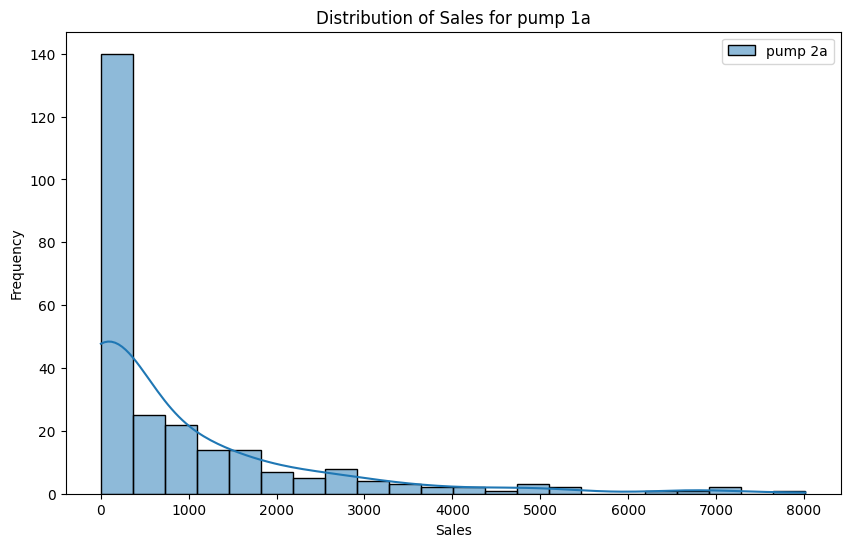

In [ ]:
#Normal distribution
# Select only the columns you want to include in the calculation
columns_to_include = ['pump 2a']

# Calculate the median sales for selected columns
median_sales = df[columns_to_include].median()

# Create a KDE plot along with a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
for column in columns_to_include:
    sns.histplot(df[column], kde=True, label=column, alpha=0.5)

plt.title('Distribution of Sales for pump 1a')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


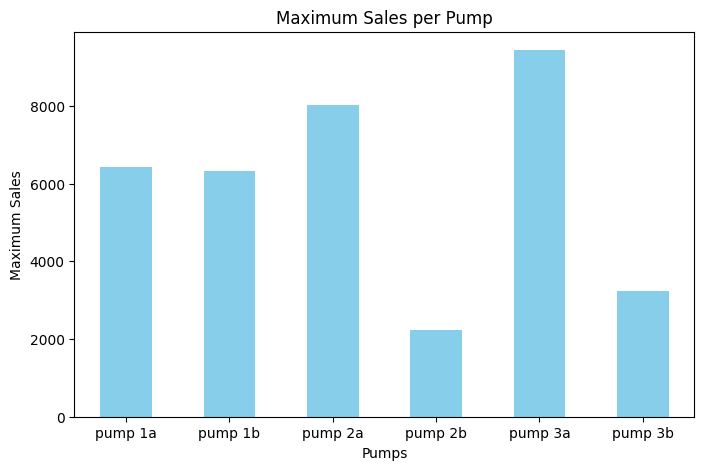

In [ ]:
# Maximum sales per pump
# Select only the columns you want to include in the calculation
columns_to_include = ['pump 1a', 'pump 1b', 'pump 2a', 'pump 2b', 'pump 3a', 'pump 3b']

# Calculate the maximum sales for selected columns
max_sales = df[columns_to_include].max()

# Create a bar chart to visualize the maximum sales for each pump
plt.figure(figsize=(8, 5))
max_sales.plot(kind='bar', color='skyblue')
plt.title('Maximum Sales per Pump')
plt.xlabel('Pumps')
plt.ylabel('Maximum Sales')
plt.xticks(rotation=0)
plt.show()


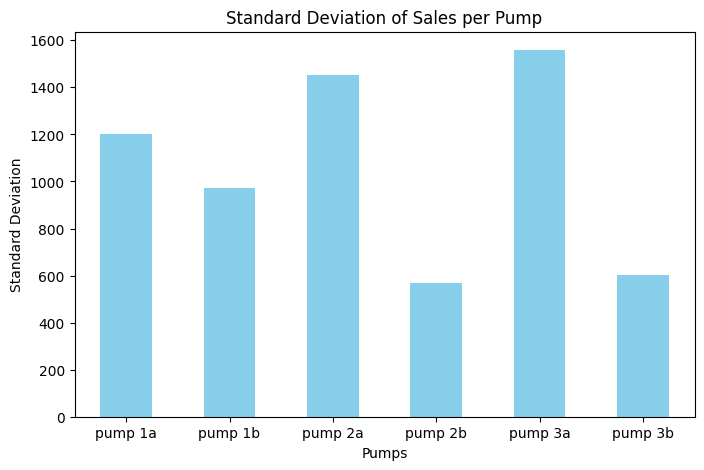

In [ ]:
# show standard deviation
# Select only the columns you want to include in the calculation
columns_to_include = ['pump 1a', 'pump 1b', 'pump 2a', 'pump 2b', 'pump 3a', 'pump 3b']

# Calculate the standard deviation of sales for selected columns
std_deviation = df[columns_to_include].std()

# Create a bar chart to visualize the standard deviation of sales for each pump
plt.figure(figsize=(8, 5))
std_deviation.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation of Sales per Pump')
plt.xlabel('Pumps')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=0)
plt.show()


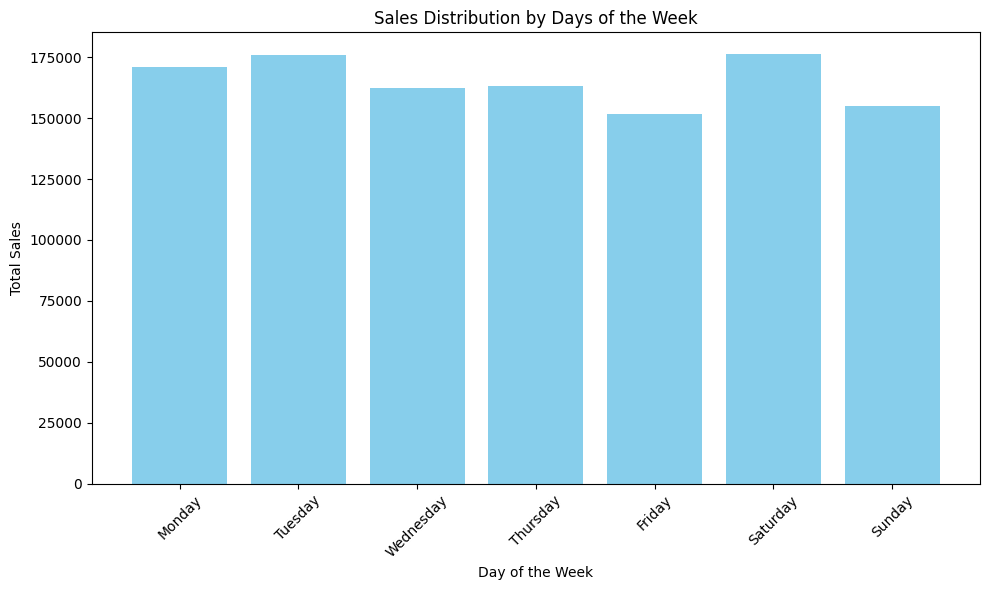

In [ ]:

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['days_of_week'] = df['date'].dt.dayofweek

# Define custom labels for days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by 'day_of_week' and calculate the total sales for each day
daily_sales = df.groupby(df['days_of_week'])['total'].sum().reset_index()

# Create a bar plot to display the sales distribution by days with light blue color
plt.figure(figsize=(10, 6))
plt.bar(day_labels, daily_sales['total'], color='skyblue')
plt.title('Sales Distribution by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#scatterplot tp detect outliners in pump 1a
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 1a'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()


In [ ]:
#scatterplot tp detect outliners in pump 1b
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 1b'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 2a
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 2a'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 2b
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 2a'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 2b
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 2b'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 3a
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 3a'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 3b
# Specify the pump name for which you want to create a scatter plot
pump_name = 'pump 3b'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='date', y=pump_name, title=f'Days vs Sales for {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
#scatterplot tp detect outliners in pump 1a
# Specify the pump name for which you want to create a scatter plot
pump_name = 'total'

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x=df.index, y=pump_name, title=f'Days vs  {pump_name}', labels={'date': 'Days', pump_name: 'Sales'})
fig.update_xaxes(tickangle=45)

# Show the interactive plot
fig.show()

In [ ]:
# Drop the 'days_of_the_week' column
df = df.drop(columns=['days_of_week'])

In [ ]:

# Define a list of colors for each pump
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan' , 'black']

# Create a time series plot for each pump using a loop with different colors
for i, column in enumerate(df.columns[1:], start=0):
    fig = px.line(df, x='date', y=column, title=f'Time Series for {column}', labels={'date': 'Date', column: 'Sales'})
    fig.update_traces(line=dict(color=colors[i % len(colors)]))  # Assign different colors
    fig.show()


In [ ]:
#check the staionarity of each pump
# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Perform the ADF test for each pump's time series data
for column in df.columns[1:]:
    result = adfuller(df[column])
    print(f'ADF Test Results for {column}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    print(f'Is {column} Stationary? {"No" if result[1] > alpha else "Yes"}')
    print()


ADF Test Results for pump 1a:
ADF Statistic: -3.734078019823255
p-value: 0.0036585647095872874
Critical Values:
1%: -3.457105309726321
5%: -2.873313676101283
10%: -2.5730443824681606
Is pump 1a Stationary? Yes

ADF Test Results for pump 1b:
ADF Statistic: -4.198380032153697
p-value: 0.0006630729639406634
Critical Values:
1%: -3.4568881317725864
5%: -2.8732185133016057
10%: -2.5729936189738876
Is pump 1b Stationary? Yes

ADF Test Results for pump 2a:
ADF Statistic: -2.8541833079974417
p-value: 0.05094116122275594
Critical Values:
1%: -3.457437824930831
5%: -2.873459364726563
10%: -2.573122099570008
Is pump 2a Stationary? No

ADF Test Results for pump 2b:
ADF Statistic: -2.001095381981218
p-value: 0.2860930189767441
Critical Values:
1%: -3.457105309726321
5%: -2.873313676101283
10%: -2.5730443824681606
Is pump 2b Stationary? No

ADF Test Results for pump 3a:
ADF Statistic: -2.8700466974270715
p-value: 0.04894367947219104
Critical Values:
1%: -3.457437824930831
5%: -2.873459364726563
10%:

# **Demand Forcast**

In this section we will use a desired forcasting method to forcast the daily sales in this brach of the company. we will take into account the chracteristics of the total sales of the daily sales of the data.

In [ ]:
# Create a time series plot using Plotlyfor total daily sales
fig = px.line(df, x='date', y='total', title='Time Series Plot of Total', line_shape='linear')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total')
# Set the line color to black
fig.update_traces(line=dict(color='black'))
# Show the plot (you can also save it to a file if needed)
fig.show()


In [ ]:
#check for stationarity
result = adfuller(df['total'])

# Extract and print the p-value
p_value = result[1]
print(f'ADF Test p-value: {p_value}')

# Check for stationarity based on the p-value
if p_value <= 0.05:
    print('The time series is likely stationary.')
else:
    print('The time series is likely not stationary.')


ADF Test p-value: 0.009408043281305064
The time series is likely stationary.


In [ ]:
# looking at the general trend of data
# Create a time series plot with a trendline using Plotly
fig = go.Figure()

# Add the time series data as a line plot
fig.add_trace(go.Scatter(x=df['date'], y=df['total'], mode='lines', name='Total'))

# Add a trendline by smoothing the data with a moving average
window_size = 7  # Adjust the window size for smoothing
df['total_smoothed'] = df['total'].rolling(window=window_size).mean()
fig.add_trace(go.Scatter(x=df['date'], y=df['total_smoothed'], mode='lines', name=f'Smoothed (Window={window_size})'))

# Customize the layout
fig.update_layout(
    title='Time Series Plot with Trendline',
    xaxis_title='Date',
    yaxis_title='Total',
    legend=dict(x=0, y=1)
)

# Show the plot (you can also save it to a file if needed)
fig.show()




In [ ]:

# Create a time series plot
fig = go.Figure()

# Add the time series data as a line plot
fig.add_trace(go.Scatter(x=df['date'], y=df['total'], mode='lines', name='Total'))

# Calculate linear regression coefficients
x_values = np.arange(len(df))
y_values = df['total']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Create the trendline
trendline = intercept + slope * x_values
fig.add_trace(go.Scatter(x=df['date'], y=trendline, mode='lines', name='Trendline'))

# Customize the layout
fig.update_layout(
    title='Time Series Plot with Straight-Line Trendline',
    xaxis_title='Date',
    yaxis_title='Total',
    legend=dict(x=0, y=1)
)

# Show the plot (you can also save it to a file if needed)
fig.show()


In [ ]:
# check for seasonality of data
# Perform seasonal decomposition
result = seasonal_decompose(df['total'], model='additive', period=12)  # Assuming a yearly seasonality (period=12)

# Create a Plotly figure
fig = go.Figure()

# Add the original time series
fig.add_trace(go.Scatter(x=df['date'], y=df['total'], mode='lines', name='Total'))

# Add the seasonal component
fig.add_trace(go.Scatter(x=df['date'], y=result.seasonal, mode='lines', name='Seasonal Component'))

# Customize the layout
fig.update_layout(
    title='Seasonal Decomposition Plot',
    xaxis_title='Date',
    yaxis_title='Value',
    legend=dict(x=0, y=1)
)

# Show the plot (you can also save it to a file if needed)
fig.show()


# **Forcast using  Winters Holt exponential smoothing**

In [ ]:
# Load your time series data (replace 'your_data.csv' with your data file)
data = pd.read_excel('/content/Final.xlsx')
# Drop the 'PUMP 4A' and 'PUMP 4B' columns
data = data.drop(['PUMP 4A', 'PUMP 4B'], axis=1)
# Convert all columns to lowercase
data.columns = [column.lower() for column in data.columns]
data['date'] = pd.to_datetime(data['date'])  # Ensure date column is in datetime format
data.set_index('date', inplace=True)  # Set date as the index


In [ ]:
# Apply Holt-Winters Exponential Smoothing
model = sm.tsa.ExponentialSmoothing(data['total'], trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Make forecasts for the next 30 days
forecast_periods = 30
forecast_values = fitted_model.forecast(steps=forecast_periods)

# Create a Plotly figure
fig = go.Figure()

# Plot the actual values in blue
fig.add_trace(go.Scatter(x=data.index, y=data['total'], mode='lines', name='Actual', line=dict(color='blue')))

# Plot the model's fitted values in green
fig.add_trace(go.Scatter(x=data.index, y=fitted_model.fittedvalues, mode='lines', name='Model Fitted', line=dict(color='green')))

# Update layout and labels
fig.update_layout(title='Holt-Winters Model vs. Actual Values',
                  xaxis_title='Date', yaxis_title='Total')
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
fig_error = go.Figure()
fig_error.add_trace(go.Scatter(x=data.index, y=forecast_errors, mode='lines', name='Forecast Errors'))
fig_error.update_layout(title='Holt-Winters Forecast Errors', xaxis_title='Date', yaxis_title='Forecast Errors')
fig_error.show()


NameError: ignored

In [ ]:
# Generate date values for the next 30 days
next_30_days = pd.date_range(start=data.index[-1] + pd.DateOffset(1), periods=forecast_periods, freq='D')

# Extend the data and forecast arrays for plotting
extended_dates = np.concatenate((data.index, next_30_days))
extended_total = np.concatenate((data['total'], forecast_values))

# Create a Plotly figure with separate traces for data and forecasts
fig_forecast = go.Figure()

# Trace for the historical data
fig_forecast.add_trace(go.Scatter(x=data.index, y=data['total'], mode='lines', name='Historical Data', line=dict(color='blue')))

# Trace for the forecasts
fig_forecast.add_trace(go.Scatter(x=next_30_days, y=forecast_values, mode='lines', name='Forecast', line=dict(color='green')))

fig_forecast.update_layout(title='Holt-Winters Forecast for the Next 30 Days',
                            xaxis_title='Date', yaxis_title='Total')
fig_forecast.show()



In [ ]:

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame({'Date': extended_dates, 'Total Forecast': extended_total})

# Filter and display the weekly forecasts
weekly_forecasts = forecast_df[forecast_df['Date'].dt.day_name() == 'Monday']
print(weekly_forecasts)
